### ANOVA Test

In [1]:
from scipy import stats

In [2]:
a=[4,3,2]
b=[2,4,6]
c=[2,1,3]

In [3]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=1.5, pvalue=0.2962962962962962)

In [4]:
import numpy as np
import pandas as pd
import math
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("C:/Users/raja asus/Desktop/Data Analytics/ANOVA.csv")

In [6]:
data

,Teaching Method1,Teaching Method2,Teaching Method3
0,4,2,2
1,3,4,1
2,2,6,3


In [7]:
df=pd.melt(data.reset_index(),id_vars=['index'],value_vars=["Teaching Method1","Teaching Method2","Teaching Method3"])
df.columns=['index','Treatments','value']

In [8]:
df

,index,Treatments,value
0,0,Teaching Method1,4
1,1,Teaching Method1,3
2,2,Teaching Method1,2
3,0,Teaching Method2,2
4,1,Teaching Method2,4
5,2,Teaching Method2,6
6,0,Teaching Method3,2
7,1,Teaching Method3,1
8,2,Teaching Method3,3


In [9]:
model=ols('value ~ C(Treatments)',data=df).fit()

In [10]:
anova=sm.stats.anova_lm(model,typ=1)

In [11]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,6.0,3.0,1.5,0.296296
Residual,6.0,12.0,2.0,NaN,NaN


### The Completely randomized single-factor experiment example (ONE-WAY ANOVA)

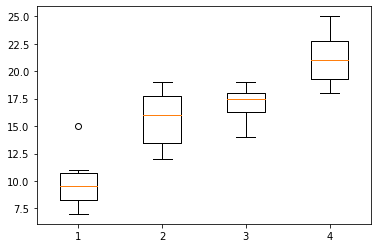

In [12]:
fivepercent=[7,8,15,11,9,10]
tenpercent=[12,17,13,18,19,15]
fifteenpercent=[14,18,19,17,16,18]
twentypercent=[19,25,22,23,18,20]
box_plot_data=[fivepercent,tenpercent,fifteenpercent,twentypercent]
plt.boxplot(box_plot_data)
plt.show()

In [13]:
scipy.stats.f_oneway(fivepercent,tenpercent,fifteenpercent,twentypercent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [14]:
1-scipy.stats.f.cdf(19.6,3,20)

3.599599239012541e-06

### Analysis of Variance

In [15]:
df=pd.read_csv("C:/Users/raja asus/Desktop/Data Analytics/Variance-Analysis.csv")

In [16]:
df

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [17]:
data=pd.melt(df.reset_index(),id_vars=['index'],value_vars=["concentration5","concentration10","concentration15","concentration20"])
data.columns=['index','Treatments','value']

In [18]:
model=ols('value ~ C(Treatments)',data=data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           3.59e-06
Time:                        16:11:22   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           15.6667      1.041     15.042      0.000      13.494      17.839
C(Treatments)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(Treatments)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(Treatments)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


### LSD

In [21]:
t=-1*scipy.stats.t.ppf(0.025,20)
n=6
MSE=6.508333
lsd=t*math.sqrt(2*MSE/n)
lsd

3.072422588325206

### Tukey-Kramern Test

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [23]:
mc=MultiComparison(data['value'],data['Treatments'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
concentration10,concentration15,1.3333,0.7827,-2.7894,5.4561,False
concentration10,concentration20,5.5,0.0066,1.3773,9.6227,True
concentration10,concentration5,-5.6667,0.0051,-9.7894,-1.5439,True
concentration15,concentration20,4.1667,0.047,0.0439,8.2894,True
concentration15,concentration5,-7.0,0.001,-11.1227,-2.8773,True
concentration20,concentration5,-11.1667,0.001,-15.2894,-7.0439,True


In [24]:
scipy.stats.f.ppf(1-0.05,dfn=4,dfd=20)

2.8660814020156584

### RBD (ANOVA)

In [25]:
df=pd.read_csv("C:/Users/raja asus/Desktop/Data Analytics/RBD.csv")

In [26]:
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [27]:
data=pd.melt(df.reset_index(),id_vars=['index'],value_vars=["System A","System B","System C"])
data.columns=['index','Treatments','value']

In [28]:
model=ols('value ~ C(Treatments)',data=data).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [29]:
df=pd.read_csv("C:/Users/raja asus/Desktop/Data Analytics/RBD1.csv")
df

,chem 1,chem 2,chem 3,chem 4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [30]:
data=pd.melt(df.reset_index(),id_vars=['index'],value_vars=["chem 1","chem 2","chem 3","chem 4"])
data.columns=['index','Treatments','value']
data

,index,Treatments,value
0,0,chem 1,1.3
1,1,chem 1,1.6
2,2,chem 1,0.5
3,3,chem 1,1.2
4,4,chem 1,1.1
5,0,chem 2,2.2
6,1,chem 2,2.4
7,2,chem 2,0.4
8,3,chem 2,2.0
9,4,chem 2,1.8


In [31]:
model=ols('value ~ C(Treatments)',data=data).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),3.0,18.044,6.014667,12.589569,0.000176
Residual,16.0,7.644,0.477750,NaN,NaN


### Two-Way ANOVA

In [32]:
df=pd.read_csv("C:/Users/raja asus/Desktop/Data Analytics/Two-Way-ANOVA.csv")

In [33]:
df

,Value,prep_pro,college
0,500,three_hr,Bussiness
1,580,three_hr,Bussiness
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Bussiness
7,540,One-day,Bussiness
8,560,One-day,Engineering
9,620,One-day,Engineering


In [34]:
f='Value ~C(college)+C(prep_pro)+C(college):C(prep_pro)'
model=ols(f,df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN
